In [1]:
import os
from glob import glob
import numpy as np
import keras.layers as L
import keras.models as M
from keras import callbacks
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/plengkeek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
files = glob('/run/media/plengkeek/Trafficdata/STACK/dataframe/test/*')
arrays = [np.genfromtxt(f, delimiter=',', skip_header=1, dtype=str) for f in files]
dataframe = np.concatenate(arrays)

In [3]:
dataframe = dataframe[np.lexsort((dataframe[:,3].astype(int), dataframe[:,4].astype(int), dataframe[:,5].astype(int), dataframe[:,6].astype(int), dataframe[:,7].astype(int)))]

In [4]:
singlelocdataframe = []
for line in dataframe:
    if line[0] == 'GEO03_D4T-RWS_I_506_V_0017_ID_1088':
        singlelocdataframe.append(line[7:].astype(float).tolist())


In [5]:
data_x = np.zeros((int(len(singlelocdataframe)/2), 2, 7))
data_y = np.zeros((int(len(singlelocdataframe)/2), 2, 7))

timesteps = 2
for i in range(len(singlelocdataframe)//2):
    data_x[i] = singlelocdataframe[i:timesteps+i]
    data_y[i] = singlelocdataframe[i+1:timesteps+i+1]
    
scale_x = np.max(data_x)
scale_y = np.max(data_y)

data_x = data_x / scale_x
data_y = data_y / scale_y

In [17]:
model_input = L.Input(shape=(2, 7))
layer1 = L.LSTM(32, return_sequences=True)(model_input)
layer2 = L.LSTM(32, return_sequences=True)(layer1)
model_output = L.LSTM(7, return_sequences=True)(layer2)

model = M.Model(inputs=model_input, outputs=model_output)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(data_x, data_y, validation_split=0.33, epochs=50)
'''''
,
          callbacks=[callbacks.EarlyStopping(monitor='val_acc',
                              min_delta=0.01,
                              patience=2,
                              verbose=0, mode='max')])
'''''
print(model.predict(data_x[0:2]) * scale_y)

Train on 452 samples, validate on 223 samples
Epoch 1/50
452/452 [==============================] - 2s 4ms/step - loss: 0.0669 - acc: 0.8009 - val_loss: 0.0655 - val_acc: 1.0000
Epoch 2/50
452/452 [==============================] - 0s 181us/step - loss: 0.0604 - acc: 1.0000 - val_loss: 0.0569 - val_acc: 1.0000
Epoch 3/50
452/452 [==============================] - 0s 181us/step - loss: 0.0504 - acc: 1.0000 - val_loss: 0.0439 - val_acc: 1.0000
Epoch 4/50
452/452 [==============================] - 0s 182us/step - loss: 0.0379 - acc: 1.0000 - val_loss: 0.0318 - val_acc: 1.0000
Epoch 5/50
452/452 [==============================] - 0s 186us/step - loss: 0.0272 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 6/50
452/452 [==============================] - 0s 177us/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.0159 - val_acc: 1.0000
Epoch 7/50
452/452 [==============================] - 0s 183us/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 8/50
452/452

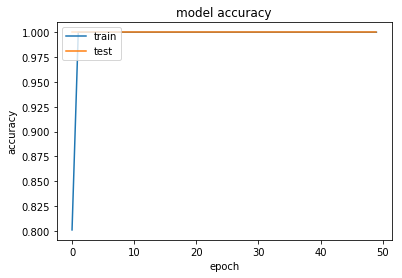

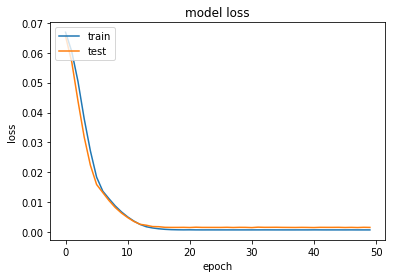

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()